In [196]:
from math import pi, sqrt, exp
from scipy.ndimage import gaussian_filter1d
import numpy as np
import cv2

import get_data as gd

def printList(values):
    c = 1
    for i in values:
        print(c, i)
        #print(c, len(i))
        c = c + 1
        
# 5x1 Gaussian Filter
def gauss(n, sigma):
    r = range(-int(n/2),int(n/2)+1)
    return [1 / (sigma * sqrt(2*pi)) * exp(-float(x)**2/(2*sigma**2)) for x in r]

In [197]:
#frame = [[0.103, -0.423, 2.320], [0.101, -0.379, 2.314], [0.108, -0.163, 2.249], [0.128, 0.025, 2.148], [-0.081, -0.223, 2.282], [-0.119, -0.426, 2.195] ,[-0.143, -0.651, 2.075] ,[-0.121, -0.755, 2.012] ,[0.258, -0.217, 2.323] ,[0.268, -0.397, 2.267] ,[0.082, -0.441, 2.052] ,[0.122, -0.477, 2.028] ,[0.012, -0.499, 2.323] ,[-0.171, -0.623, 2.102] ,[-0.181, -0.826, 2.039] ,[-0.121, -0.814, 2.076] ,[0.204, -0.494, 2.339] ,[0.305, -0.643, 2.083] ,[0.286, -0.788, 2.114] ,[0.273, -0.854, 2.087]]

#frame = gd.load_data("norm_train.p")
frame = gd.load_data("train.p")
#frame = frame["a15_s06_e01_skeleton_proj.txt"]
frame = frame["a08_s01_e01_skeleton_proj.txt"]

for i in range(len(frame)):
    for j in range(len(frame[i])):
        frame[i][j].pop(0)
        frame[i][j].pop(0)

for i in range(len(frame)):
    for j in range(len(frame[i])):
        if(len(frame[i][j]) != 3):
            print("FUCK")

In [198]:
# print("-----[ BEFORE ]-----")
# printList(frame)
# print()

o = 1
n = 5

filter = gauss(n, o)
filter = tuple(filter)
#print(filter)
kernel = cv2.getGaussianKernel(ksize=n,sigma=o)
kernel = kernel.T
print(kernel)
print()
#printList(frame)
print()
print(frame[0][0])
print()
kernel = [0.05448868, 0.24420134, 0.40261995, 0.24420134, 0.05448868]

temp = []
for i in range(len(frame)-5):
    ans = []
    ans.append(frame[i])
    ans.append(frame[i+1])
    ans.append(frame[i+2])
    ans.append(frame[i+3])
    ans.append(frame[i+4])
    temp.append(ans)

temp = np.array(temp)
print(temp.shape)
print()

def cool(x):   
    for i in range(len(x)): #1-5
        k = kernel[i]
        x[i] = x[i]*k
    return sum(x)
            




x = temp[0]
cool(x)

final = []
for i in range(len(temp)):
    final.append(cool(temp[i]))

print(len(final))

frame_data = final[60]
print(frame_data)
print()
print(frame_data[:,2])

[[0.05448868 0.24420134 0.40261995 0.24420134 0.05448868]]


[-0.042, -0.432, 2.252]

(104, 5, 20, 3)

104
[[-0.08205449 -0.31995056  2.40535315]
 [-0.09894551 -0.2792442   2.45576082]
 [-0.10432693 -0.01034109  2.48070633]
 [-0.098       0.20427244  2.50605446]
 [-0.26790311 -0.00659736  2.46593844]
 [-0.36646816  0.19941781  2.40219575]
 [-0.39204247  0.4234128   2.39497671]
 [-0.38231082  0.49324934  2.39203019]
 [ 0.05601613  0.01960346  2.56767809]
 [ 0.16260745  0.25082442  2.52377796]
 [ 0.1621675   0.47084259  2.49007968]
 [ 0.14380324  0.53414832  2.46987381]
 [-0.17125124 -0.38877293  2.34743589]
 [-0.1852442  -0.5557013   1.94829867]
 [-0.198      -0.84705448  1.84570634]
 [-0.1722442  -0.88235317  1.76135316]
 [ 0.01870636 -0.40157618  2.42159231]
 [ 0.0972442  -0.55499999  2.01875578]
 [ 0.15370131 -0.82016346  1.87899998]
 [ 0.17964682 -0.85540766  1.79429867]]

[2.40535315 2.45576082 2.48070633 2.50605446 2.46593844 2.40219575
 2.39497671 2.39203019 2.56767809 2.52377796

In [199]:
# initialize joint colors of skeleton
colors = ['blue' for i in range(20)]
colors[0] = 'red'  # hip is red
colors[7] = 'green'  # hands and feet are green
colors[11] = 'green'
colors[15] = 'green'
colors[19] = 'green'
colors[3] = 'black' # head is black

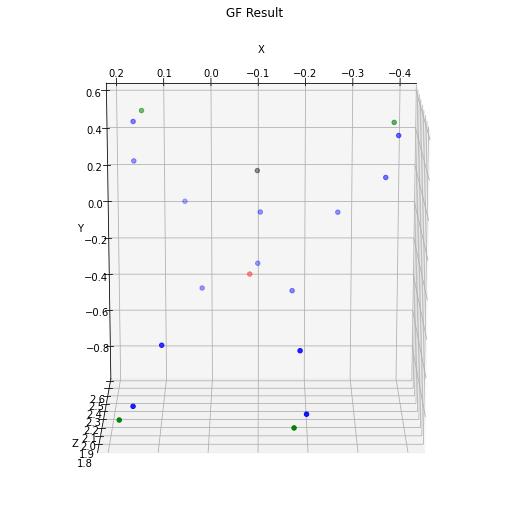

In [200]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

xs, ys, zs = frame_data[:,0], frame_data[:,1], frame_data[:,2]

fig = plt.figure()
fig.set_size_inches(19.5, 19.5)

# plot 1 non normalized data
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
scatter_1 = ax.scatter(xs, ys, zs, color=colors, label='Raw Skeleton Data')
ax.view_init(-75,  90)
ax.set_title('GF Result')

# # plot 2 normalized skeleton data
# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# scatter_2 = ax.scatter(xs_norm, ys_norm, zs_norm, color=colors, label='Normalized Skeleton Data')
# ax.view_init(-75,  90)
# ax.set_title('normalized skeleton data')

plt.show()